In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import sklearn

In [3]:
df = pd.read_csv('HousePrice.csv')

In [4]:
df.shape

(13320, 9)

In [5]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [9]:
#to count the values in the dataset
def value_counts(df):
    for var in df.columns:
        print(df[var].value_counts())
        print("------------------------")

In [10]:
value_counts(df)

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64
------------------------
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
16-Jul               1
14-Nov               1
16-Jan               1
15-Dec               1
15-Jun               1
Name: availability, Length: 81, dtype: int64
------------------------
Whitefield                                540
Sarjapur  Road                            399
Electronic City                           302
Kanakpura Road                            273
Thanisandra                               234
                                         ... 
BAGUR                                       1
Rammana Layout                              1
Banashankari 6th Stage ,Subramanyapura      1
Haralur Road,                               1
HAL Layout                                  1


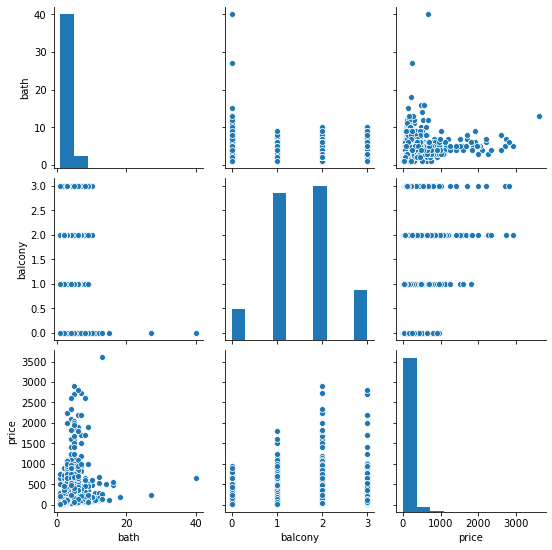

In [11]:
sns.pairplot(df)

In [12]:
df.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

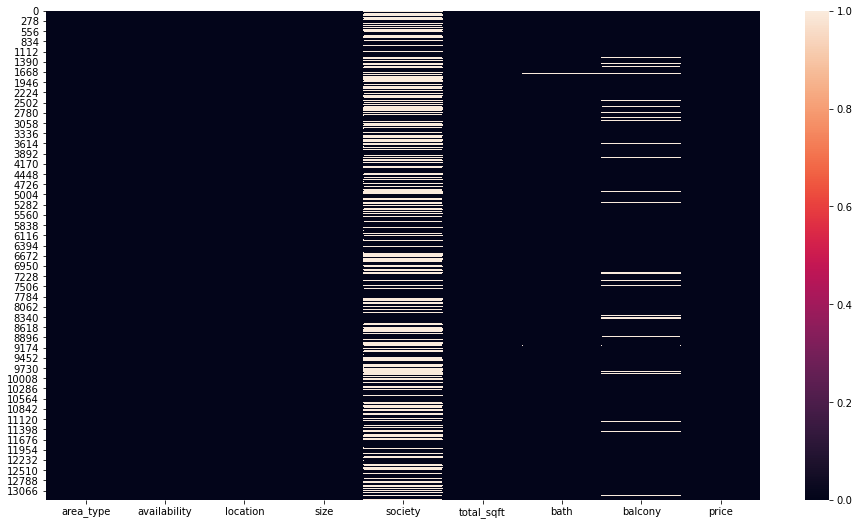

In [13]:
plt.figure(figsize=(16,9))
sns.heatmap(df.isna())

In [14]:
df = df.drop('society', axis='columns')
df.shape

(13320, 8)

In [15]:
df['balcony'] = df['balcony'].fillna(df['balcony'].mean()) 

In [16]:
df.isna().sum()

area_type        0
availability     0
location         1
size            16
total_sqft       0
bath            73
balcony          0
price            0
dtype: int64

In [17]:
backup = df.copy()

In [18]:
df = df.dropna()
df.shape

(13246, 8)

In [19]:
df.isna().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [20]:
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13246 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13246 non-null  object 
 1   availability  13246 non-null  object 
 2   location      13246 non-null  object 
 3   size          13246 non-null  object 
 4   total_sqft    13246 non-null  object 
 5   bath          13246 non-null  float64
 6   balcony       13246 non-null  float64
 7   price         13246 non-null  float64
dtypes: float64(3), object(5)
memory usage: 931.4+ KB


In [22]:
total_sqft_int = []
for str_val in df['total_sqft']:
    try:
        total_sqft_int.append(float(str_val))
    except:
        try:
            temp = []
            temp = str_val.split('-')
            total_sqft_int.append((float(temp[0])+float(temp[-1]))/2) #if 12-14 then (12 + 14)/2
        except:
            total_sqft_int.append(np.nan) #if value not there in the following format then nan

In [23]:
df = df.reset_index(drop=True)

In [24]:
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [25]:
df = df.join(pd.DataFrame({'total_sqft_int':total_sqft_int}))
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,1056.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,2600.0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,1440.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,1521.0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00,1200.0


In [26]:
df.isna().sum()

area_type          0
availability       0
location           0
size               0
total_sqft         0
bath               0
balcony            0
price              0
total_sqft_int    46
dtype: int64

In [27]:
df = df.dropna()
df.shape

(13200, 9)

In [28]:
size_int = []
for str_val in df['size']:
    temp = []
    temp = str_val.split(" ")
    try:
        size_int.append(int(temp[0])) 
    except:
        size_int.append(np.nan)

In [29]:
df = df.reset_index(drop=True)

In [30]:
df = df.join(pd.DataFrame({'bhk': size_int}))
df.shape

(13200, 10)

In [32]:
df = df[~(df['total_sqft_int']/df['bhk'] < 350)]
df.shape

(12106, 10)

In [33]:
df['price_per_sqft'] = df['price']*100000 / df['total_sqft_int']
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int,bhk,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,1056.0,2,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,2600.0,4,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,1440.0,3,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,1521.0,3,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00,1200.0,2,4250.000000


In [34]:
backup1 = df.copy()

In [35]:
def remove_pps(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st))&(subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out

df = remove_pps(df)
df.shape  # Removing outliers using help of 'price per sqrt'  taking std and mean per location

(8888, 11)

In [36]:
df[df.bath > df.bhk+2]

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int,bhk,price_per_sqft
1861,Built-up Area,Ready To Move,Chikkabanavar,4 Bedroom,2460,7.0,2.000000,80.0,2460.0,4,3252.032520
5836,Built-up Area,Ready To Move,Nagasandra,4 Bedroom,7000,8.0,1.584376,450.0,7000.0,4,6428.571429
7098,Super built-up Area,Ready To Move,Sathya Sai Layout,6 BHK,11338,9.0,1.000000,1000.0,11338.0,6,8819.897689
7569,Super built-up Area,Ready To Move,Thanisandra,3 BHK,1806,6.0,2.000000,116.0,1806.0,3,6423.034330


In [37]:
df = df[df.bath < df.bhk+2]
df.shape

(8801, 11)

In [38]:
df = df.drop(['area_type', 'availability', 'location', 'size', 'total_sqft'], axis=1)
df.head()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft
0,3.0,2.0,150.0,1672.0,3,8971.291866
1,3.0,3.0,149.0,1750.0,3,8514.285714
2,3.0,2.0,150.0,1750.0,3,8571.428571
3,2.0,3.0,44.0,1250.0,3,3520.000000
4,2.0,2.0,40.0,1250.0,2,3200.000000


In [39]:
df.to_csv("clean_data.csv", index=False)

In [40]:
dff = pd.read_csv('clean_data.csv')
dff.shape

(8801, 6)

In [41]:
X = dff.drop('price', axis=1)
y = dff['price']
print('shape of X = ', X.shape)
print('shape of y = ', y.shape)

shape of X =  (8801, 5)
shape of y =  (8801,)


In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 51)

In [43]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)


In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr = LinearRegression()

In [45]:
def rmse(y_test, y_pred):
    return np.sqrt(mean_squared_error(y_test, y_pred))

In [46]:
lr.fit(X_train, y_train)
lr_score = lr.score(X_test, y_test)
lr_rmse = rmse(y_test, lr.predict(X_test))
lr_score, lr_rmse

(0.8834510060310367, 27.118663608265052)

In [47]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
rfr_score = rfr.score(X_test, y_test)
rfr_rmse = rmse(y_test, rfr.predict(X_test))
rfr_score, rfr_rmse

(0.9871334705966716, 9.010413624508761)

In [48]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
dtr_score = dtr.score(X_test, y_test)
dtr_rmse = rmse(y_test, dtr.predict(X_test))
dtr_score, dtr_rmse

(0.9847319342025218, 9.815355432038118)

In [49]:
models = {"Linear Regression": LinearRegression(),
          "Random Forest": RandomForestRegressor(),
          "Decision tree": DecisionTreeRegressor()}

#Fit the data
def fit_and_score(models, X_train, X_test, y_train, y_test):
    #random seed for reproducible results
    np.random.seed(51)
    model_scores={}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores 

In [50]:
#Evaluating the Model Scores
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

{'Linear Regression': 0.8834510060310367,
 'Random Forest': 0.9880104936298432,
 'Decision tree': 0.9815951775601279}

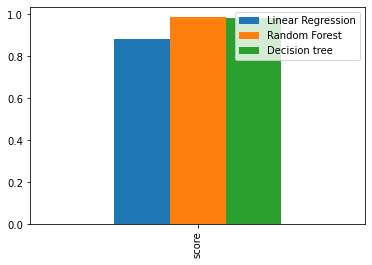

In [51]:
#Comparing the models
model_compare = pd.DataFrame(model_scores, index=['score'])
model_compare.plot.bar();